## Data Exploration of the Auto Insurance Claims dataset

This project is aimed at emulating workflows for risk segmentation and claims prediction within the industry of Car insurance. We use the dataset collected from https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data/data, which in turn was collected from https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/4954928053318020/1058911316420443/167703932442645/latest.html 

The goal of the project is to cluster policyholders based upon past behaviors, predict claim amounts for customers who file an claim, and predict how likely a customer is to file a claim. 

We aim to use real-world methodologies and mindsets, and we want to present a storyline for insurance pricing as according to 

**Segment** &rarr; **Predict Claim Probability** &rarr; **Predict claim amount**

We begin by exploring the data we have access to, and operate under the knowledge that there is an limited availability to open sources of insurance datas due to data protection legalislation. This project uses an open-source data set sourced from Kaggle for prototyping, and will later explore more extensive datasets. 

In [45]:
from pathlib import Path
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Path to project root
PROJECT_ROOT = Path.home() / "Desktop" / "Insurance_Project"

# Add root to Python path
sys.path.append(str(PROJECT_ROOT))


In [46]:
from pathlib import Path
import os
import importlib
from src.data import preprocessing as pr
file_path = PROJECT_ROOT/"data"/"raw"/"insurance_claims.csv"
data = pr.load_data(file_path)

### Cursory Analysis of dataset. 

We show the first few rows of the dataset, and observe that there are 40 features in the dataset and we show the datatype associated with each feature in the table below

In [69]:
columns = pd.DataFrame(data.dtypes)
columns

0
months_as_customer             int64
age                            int64
policy_number                  int64
policy_bind_date              object
policy_state                  object
policy_csl                    object
policy_deductable              int64
policy_annual_premium        float64
umbrella_limit                 int64
insured_zip                    int64
insured_sex                   object
insured_education_level       object
insured_occupation            object
insured_hobbies               object
insured_relationship          object
capital-gains                  int64
capital-loss                   int64
incident_date                 object
incident_type                 object
collision_type                object
incident_severity             object
authorities_contacted         object
incident_state                object
incident_city                 object
incident_location             object
incident_hour_of_the_day       int64
number_of_vehicles_involved    int64
property_damage               object
bodily_injuries                int64
witnesses                      int64
police_report_available       object
total_claim_amount             int64
injury_claim                   int64
property_claim                 int64
vehicle_claim                  int64
auto_make                     object
auto_model                    object
auto_year                      int64
fraud_reported                object
_c39                         float64

In [53]:
#Inspecting the dataset
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

We can furthermore see, from calling `data.shape`, that the dataframe currently holds 1000 rows

In [55]:
data.shape

(1000, 40)

### Missing values per feature

We continue our data exploration by investigating the amount of missing values in each feature, where the feature `_c39` holds no information at all. We therefore drop that feature, and continue our analysis by noting that there are no further missing values except in the prototype data except for in the column `authorities_contacted`. Something that might strain incredulity since real-world data will be significantly more noisy and contain much more missing data. 

We will implement functions for handling and identifying noise and missing data, and use these methods on the prototype data even though it is only for the purposes of preparing for more realistic data.

In [59]:
missing_values = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
missing_values

0
_c39                         1000
authorities_contacted          91
months_as_customer              0
age                             0
policy_state                    0
policy_csl                      0
policy_number                   0
policy_bind_date                0
policy_annual_premium           0
policy_deductable               0
insured_sex                     0
umbrella_limit                  0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
insured_zip                     0
capital-gains                   0
capital-loss                    0
incident_type                   0
incident_date                   0
collision_type                  0
incident_severity               0
incident_state                  0
insured_education_level         0
incident_city                   0
incident_location               0
number_of_vehicles_involved     0
incident_hour_of_the_day        0
bodily_injuries                 0
witnesses                       0
police_report_available         0
property_damage                 0
total_claim_amount              0
injury_claim                    0
vehicle_claim                   0
property_claim                  0
auto_make                       0
auto_model                      0
auto_year                       0
fraud_reported                  0

In [ ]:
# We drop the _c39 column since it is only NaN

data = data.drop("_c39", axis=1)
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [60]:
# We inspect the column where there are missing values present
data['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [61]:
data['authorities_contacted'].describe()

count        909
unique         4
top       Police
freq         292
Name: authorities_contacted, dtype: object

In [70]:
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [73]:
# Exploring rows where there are null values present in authorities_contacted
data[data["authorities_contacted"].isna()]

months_as_customer  age  policy_number policy_bind_date policy_state  \
4                   228   44         367455       2014-06-06           IL   
13                  121   34         626808       2012-10-26           OH   
27                  202   34         608513       2002-07-18           IN   
37                  289   49         933293       1993-02-03           IL   
51                   91   27         537546       1994-08-20           IL   
..                  ...  ...            ...              ...          ...   
940                 308   47         720356       2013-09-16           OH   
942                 108   31         148498       2002-01-04           IN   
950                 101   27         557218       1997-11-23           IL   
953                 229   43         791425       1997-06-18           IN   
994                 141   30         681486       2007-03-24           IN   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
4     500/1000               1000                1583.91         6000000   
13     100/300               1000                 936.61               0   
27     100/300                500                 848.07         3000000   
37    500/1000               2000                1222.48               0   
51     100/300               2000                1073.83               0   
..         ...                ...                    ...             ...   
940    100/300               1000                1013.61         6000000   
942    250/500               2000                1112.04         6000000   
950   500/1000                500                 982.70         6000000   
953    250/500               2000                1585.54               0   
994   500/1000               1000                1347.04               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
4         610706  ...                      NO               6500         1300   
13        464652  ...                      NO               7280         1120   
27        607730  ...                       ?               5720         1040   
37        620757  ...                     YES               5330         1230   
51        609930  ...                       ?               7260         1320   
..           ...  ...                     ...                ...          ...   
940       452349  ...                     YES               5590          860   
942       472209  ...                      NO               4290          780   
950       440865  ...                      NO               5170          940   
953       463153  ...                     YES               4620          420   
994       430665  ...                     YES               6480          540   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
4              650          4550      Accura         RSX      2009   
13            1120          5040      Toyota  Highlander      2010   
27             520          4160      Suburu   Forrestor      2003   
37             820          3280      Suburu      Legacy      2001   
51             660          5280         BMW          M5      2008   
..             ...           ...         ...         ...       ...   
940            860          3870      Suburu     Impreza      2002   
942            780          2730  Volkswagen      Passat      1998   
950            470          3760      Toyota       Camry      2001   
953            840          3360  Volkswagen       Jetta      2012   
994           1080          4860       Honda       Civic      1996   

    fraud_reported _c39  
4                N  NaN  
13               N  NaN  
27               Y  NaN  
37               N  NaN  
51               N  NaN  
..             ...  ...  
940              N  NaN  
942              N  NaN  
950              N  NaN  
953              N  NaN  
994              N  NaN  

[91 rows x 40 columns]

In [ ]:
n_nan = data.isna().sum().sum()
print(f"Ratio of rows with NaN values in the dataset: {n_nan/len(data)}")

Ratio of rows with NaN values in the dataset: 0.091


We can notice that there do not seem to be any clear patterns regarding when the NaN values are present, and the affected rows account for around 9 %. We choose to impute the missing values since the dataset is already quite small

In [ ]:
# We explore if there are any duplicate values in the dataset
if data.duplicated().any():
    d_cols = [col for col in data.columns if data[col].duplicated().any()]
    print(f"There are duplicated values in the data set at {d_cols}")
    
print(f"Amount of duplicated rows {data.duplicated().sum()}")

Amount of duplicated rows 0


In [85]:
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], yearfirst=True)
data['insured_zip'] = data['insured_zip'].astype(object)
data = data.drop('_c39', axis=1)
date_cols = data.select_dtypes(include="datetime").columns
for col in date_cols:
    print(f"Date Column --------- {col}")
print("\n----------------------------------------------------\n")
num_cols = data.loc[:,~data.columns.isin(date_cols)].select_dtypes(include="number").columns
for col in num_cols:
    print(f"Numerical Column --------- {col}")

print("\n----------------------------------------------------\n")
cat_cols = data.select_dtypes(include="object").columns
for col in cat_cols:
    print(f"Categorical Column --------- {col}")

num_cols.drop("policy_number")



Date Column --------- policy_bind_date

----------------------------------------------------

Numerical Column --------- months_as_customer
Numerical Column --------- age
Numerical Column --------- policy_number
Numerical Column --------- policy_deductable
Numerical Column --------- policy_annual_premium
Numerical Column --------- umbrella_limit
Numerical Column --------- capital-gains
Numerical Column --------- capital-loss
Numerical Column --------- incident_hour_of_the_day
Numerical Column --------- number_of_vehicles_involved
Numerical Column --------- bodily_injuries
Numerical Column --------- witnesses
Numerical Column --------- total_claim_amount
Numerical Column --------- injury_claim
Numerical Column --------- property_claim
Numerical Column --------- vehicle_claim
Numerical Column --------- auto_year

----------------------------------------------------

Categorical Column --------- policy_state
Categorical Column --------- policy_csl
Categorical Column --------- insured_zip


Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [86]:
print(data[cat_cols].value_counts())

policy_state  policy_csl  insured_zip  insured_sex  insured_education_level  insured_occupation  insured_hobbies  insured_relationship  incident_date  incident_type             collision_type   incident_severity  authorities_contacted  incident_state  incident_city  incident_location   property_damage  police_report_available  auto_make   auto_model  fraud_reported
IL            100/300     430141       FEMALE       Masters                  protective-serv     camping          unmarried             2015-01-09     Single Vehicle Collision  Rear Collision   Total Loss         Police                 NY              Northbrook     4981 Weaver St      ?                YES                      Suburu      Forrestor   Y                 1
                          430232       FEMALE       JD                       exec-managerial     golf             unmarried             2015-01-30     Single Vehicle Collision  Rear Collision   Major Damage       Ambulance              WV              Arlingt

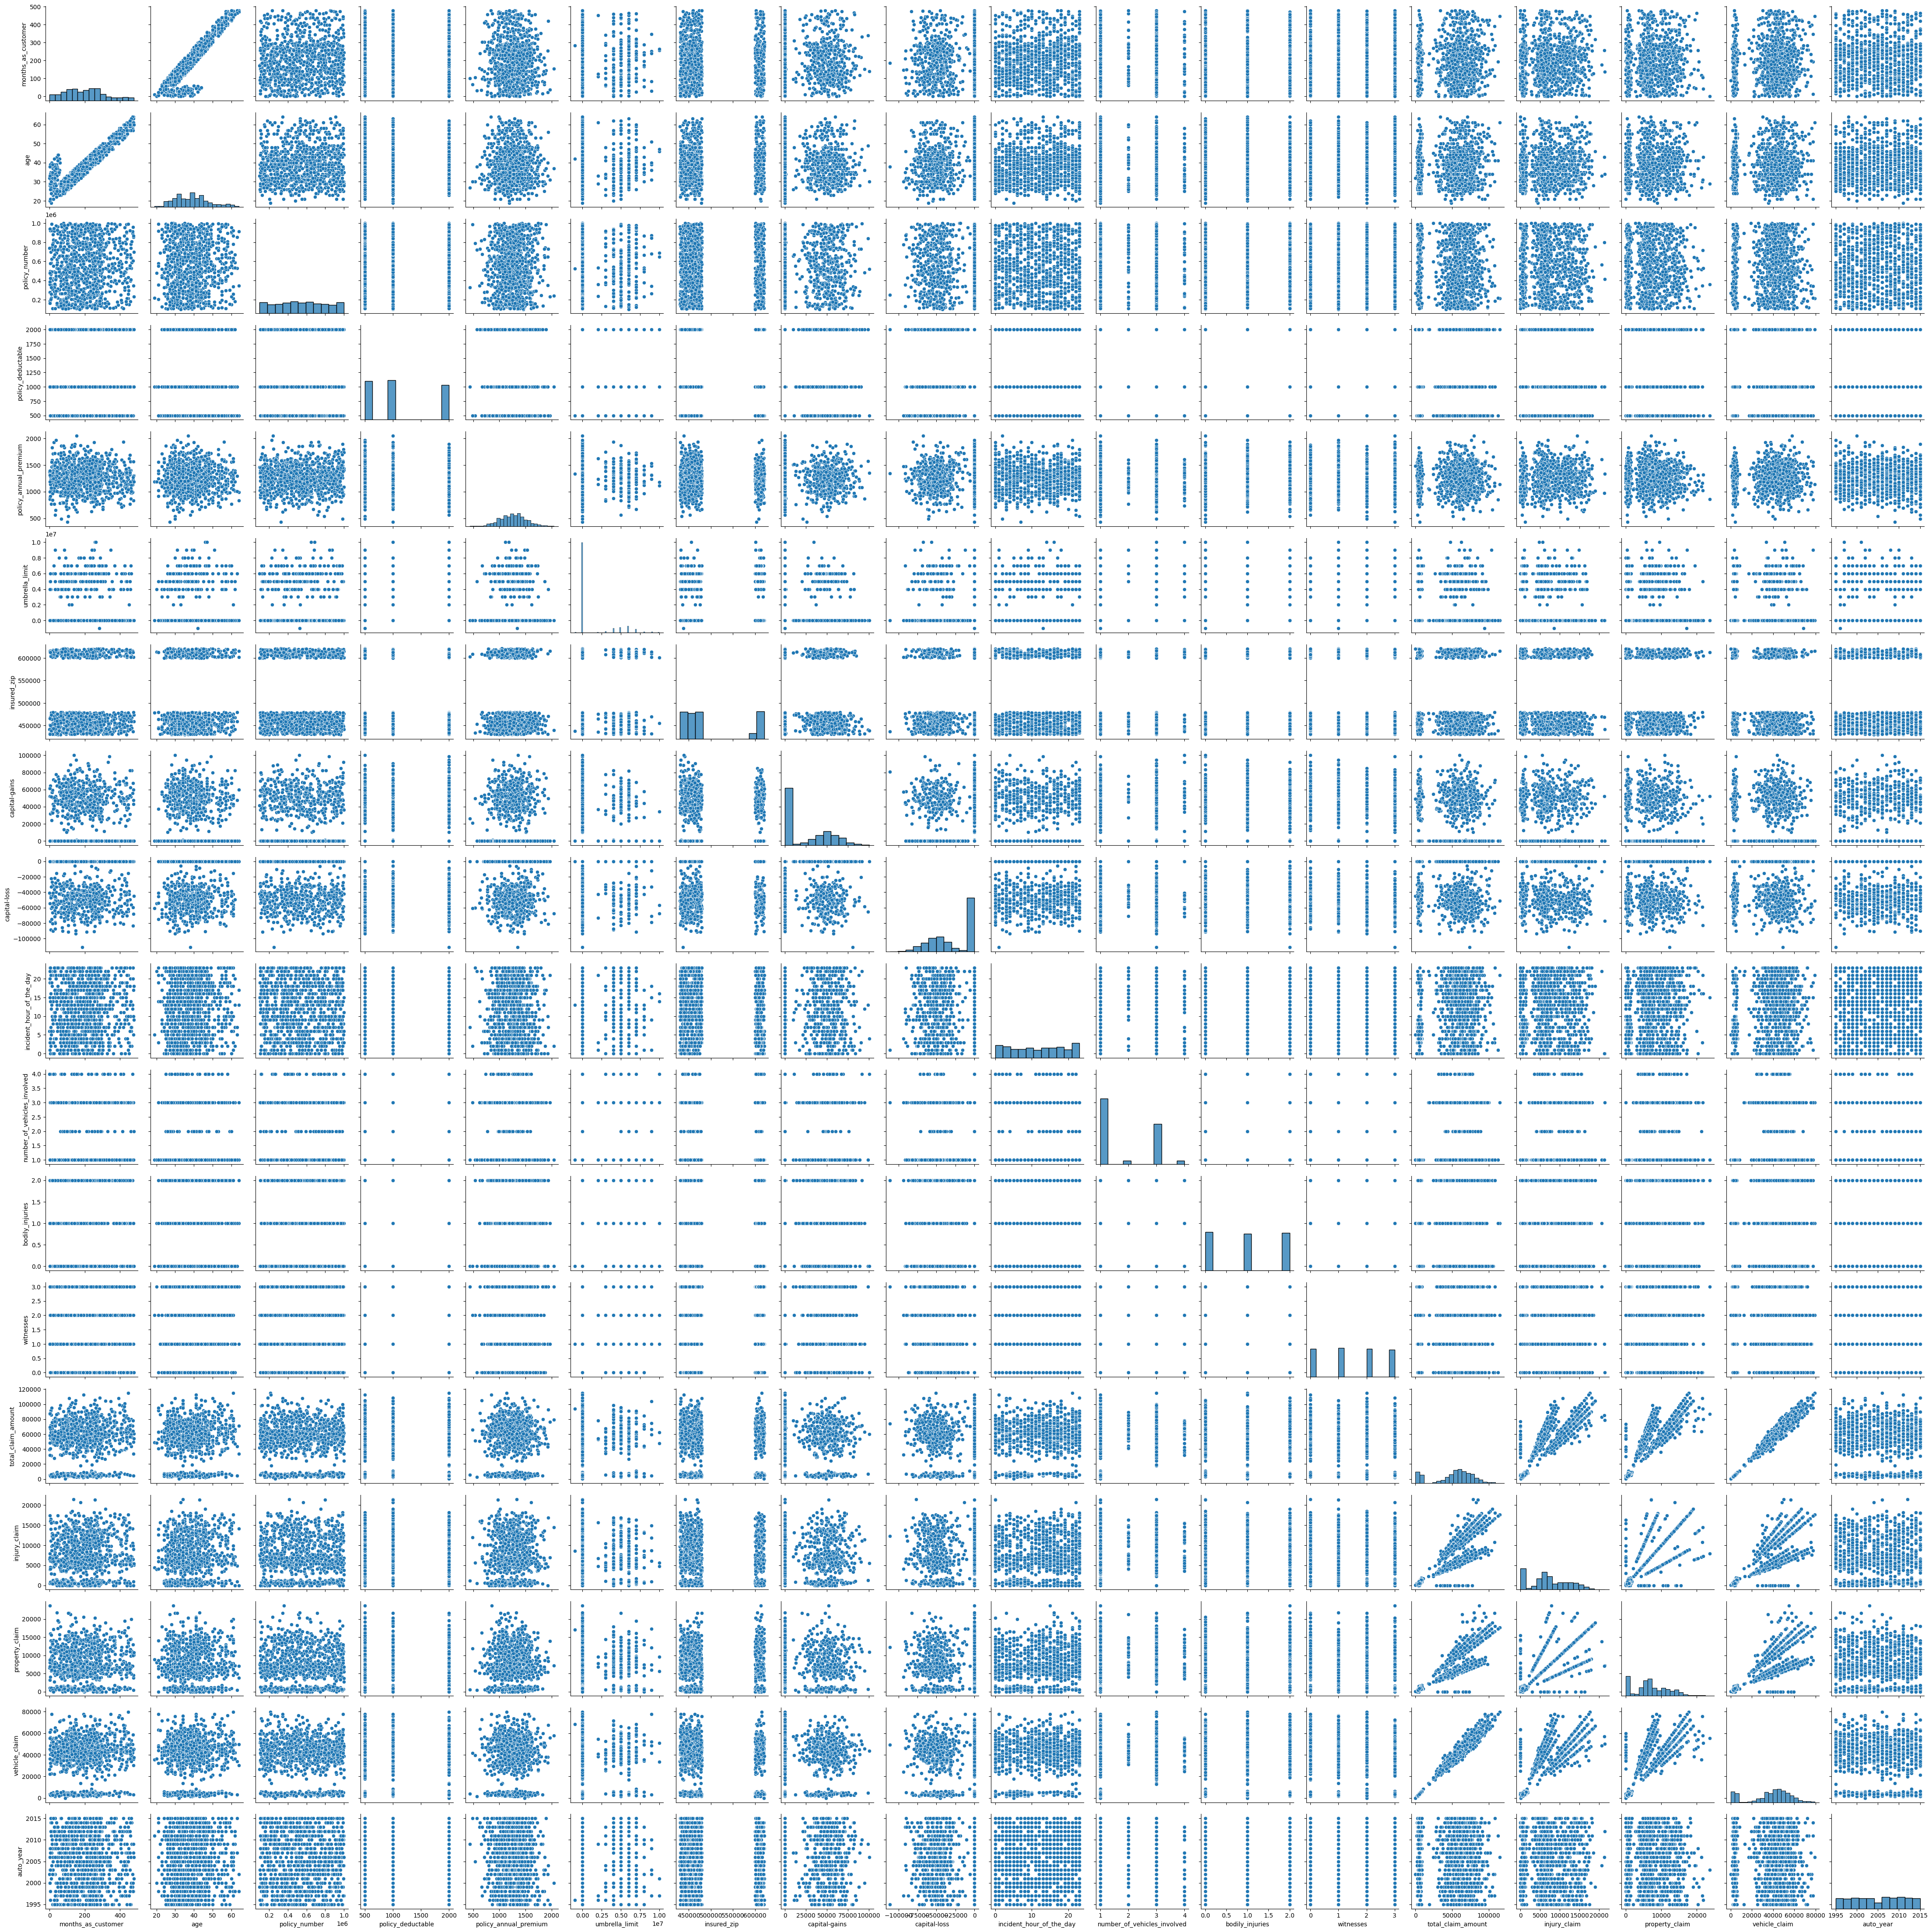

In [ ]:
sns.pairplot(data[num_cols])
plt.savefig(PROJECT_ROOT/"reports"/"graphs"/"pairplot.png")

In [ ]:
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000